# EE915: Week-6 - Project-6 - K Means Clustering
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: Customers Credit Card Data </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project uses K Means Clustering

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.


In [1]:
%pip install seaborn
%pip install wordcloud
%pip install scikit-learn
%pip install matplotlib
%pip install liac-arff
%pip install scipy





[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
import pandas as pd
from sklearn.decomposition import PCA

In [8]:
# Define roll number, name, email
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

#  Load spotify data

df = pd.read_csv('spotify.csv')

# Display the first few rows of the dataframe
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [9]:
# Selecting relevant columns for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features]

# Optional: Standardize the data if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose an appropriate number of clusters

# Fit the model
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(df.head())


                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

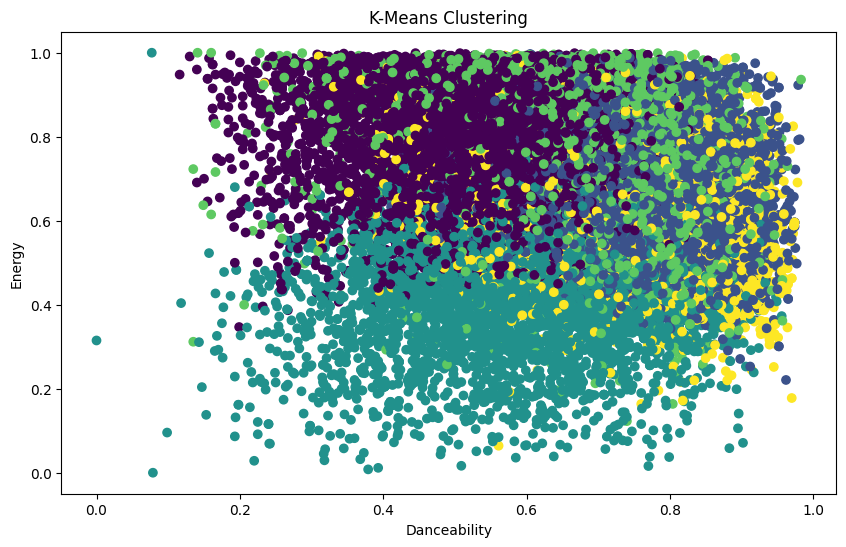

In [11]:
# Plotting clusters (using two features as an example)
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-Means Clustering')
plt.show()


In [12]:
# Drop any non-numeric columns that shouldn't be used in clustering
# Assuming 'track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name',
# 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre' are non-numeric

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Selecting all numeric columns
X = df[numeric_features]

# Display the numeric columns being used
print(X.head())

   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                66         0.748   0.916    6    -2.634     1       0.0583   
1                67         0.726   0.815   11    -4.969     1       0.0373   
2                70         0.675   0.931    1    -3.432     0       0.0742   
3                60         0.718   0.930    7    -3.778     1       0.1020   
4                69         0.650   0.833    1    -4.672     1       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0        0.1020          0.000000    0.0653    0.518  122.036       194754  
1        0.0724          0.004210    0.3570    0.693   99.972       162600  
2        0.0794          0.000023    0.1100    0.613  124.008       176616  
3        0.0287          0.000009    0.2040    0.277  121.956       169093  
4        0.0803          0.000000    0.0833    0.725  123.976       189052  


In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


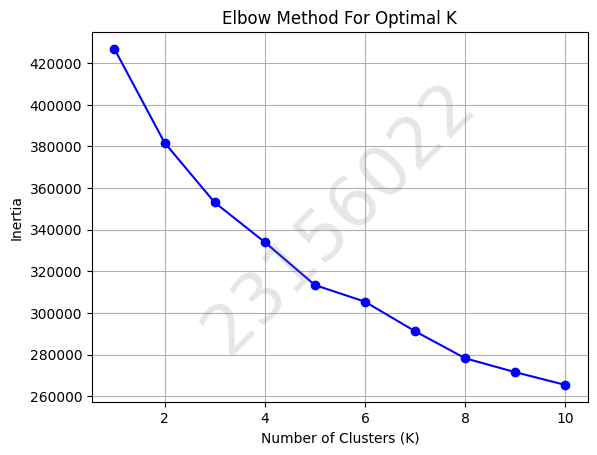

In [17]:
# Determine the optimal number of clusters

# Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


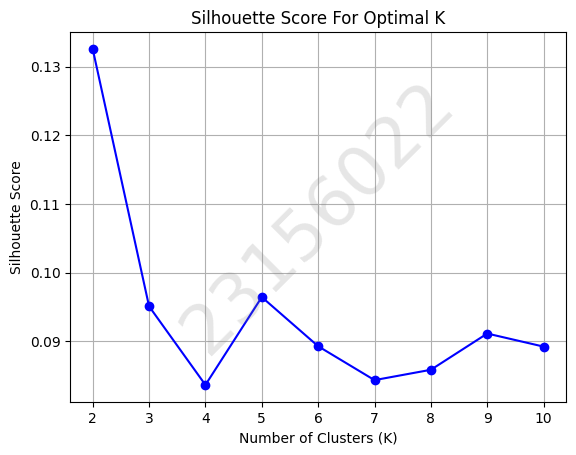

In [20]:
# Quality of clustering - silhoutte score

silhouette_scores = []

# Initialize a variable to store the minimum silhouette score and corresponding k value
min_score = float('inf')
min_k = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    # Check if the current score is the lowest
    if score < min_score:
        min_score = score
        min_k = k

plt.figure()
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.grid(True)
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


In [22]:
# Initialize KMeans with an appropriate number of clusters, say 5
kmeans = KMeans(n_clusters=min_k, random_state=42)

# Fit the model on the standardized data
kmeans.fit(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the first few rows with the cluster labels
print(df.head())


                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

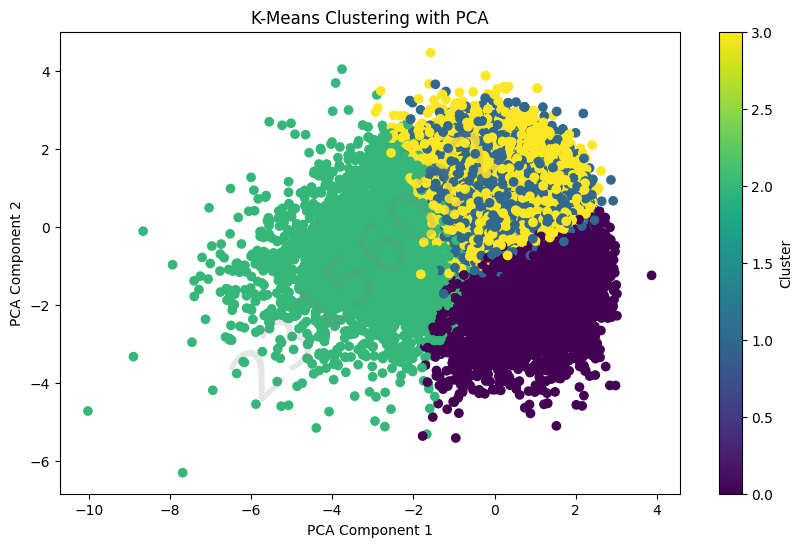

In [27]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


In [ ]:
!jupyter nbconvert --to pdf Proj_06_Kmeans_Full.ipynb
